In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/bike and cars/Bike and cars/Train',
    labels='inferred',
    label_mode ='int',
    batch_size=10,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/bike and cars/Bike and cars/Test',
    labels='inferred',
    label_mode ='int',
    batch_size=10,
    image_size=(256, 256)
)

Found 102 files belonging to 2 classes.
Found 30 files belonging to 2 classes.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Normalize
def process(image,label):
    image = tf.cast(image/5. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 40)        7240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 40)       0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
11/11 [==============================] - 28s 559ms/step - loss: 7.7396 - accuracy: 0.4412 - val_loss: 1.4903 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 1s 37ms/step - loss: 1.0091 - accuracy: 0.6373 - val_loss: 0.6282 - val_accuracy: 0.5333
Epoch 3/10
11/11 [==============================] - 1s 36ms/step - loss: 0.4071 - accuracy: 0.8529 - val_loss: 0.5486 - val_accuracy: 0.6667
Epoch 4/10
11/11 [==============================] - 1s 37ms/step - loss: 0.1611 - accuracy: 0.9706 - val_loss: 0.6138 - val_accuracy: 0.6333
Epoch 5/10
11/11 [==============================] - 0s 28ms/step - loss: 0.0586 - accuracy: 0.9902 - val_loss: 0.7435 - val_accuracy: 0.7000
Epoch 6/10
11/11 [==============================] - 0s 27ms/step - loss: 0.0341 - accuracy: 0.9902 - val_loss: 1.1816 - val_accuracy: 0.6667
Epoch 7/10
11/11 [==============================] - 1s 32ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.7088 - val_accuracy: 0.7000
Epoch 8/10


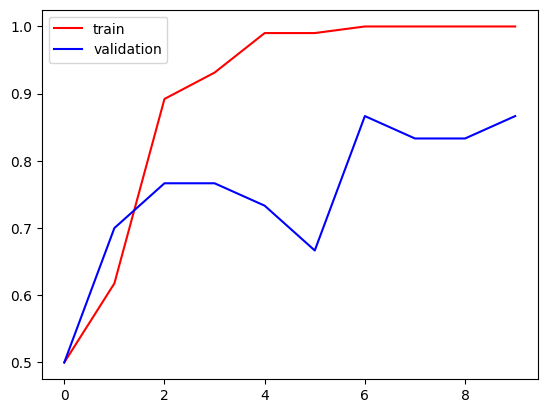

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
import cv2

In [11]:
def predict(image):
  test_img = cv2.imread(image)
  print(f'The image is of shape{test_img.shape}')
  test_img = cv2.resize(test_img,(256,256))
  test_input = test_img.reshape((1,256,256,3))
  res = model.predict(test_input)
  if res[0][0] > 0.5:
    print("The image is of a Car")
  else:
    print("The image is of a Bike")

In [14]:
predict('/content/featured-4.jpeg')

The image is of shape(500, 1170, 3)
1/1 [==============================] - 0s 19ms/step
The image is of a Bike
